In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track,
                             )

In [2]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

# Explanation

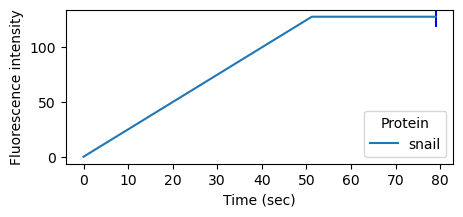

In [3]:
# Translation profil for different protein with same translation rate

translation_rate = 15 #(aa/s)
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()


prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance * x * fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max

ax.plot(x, y, label="snail")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="blue")

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Protein")
fig.set_size_inches((5, 2))

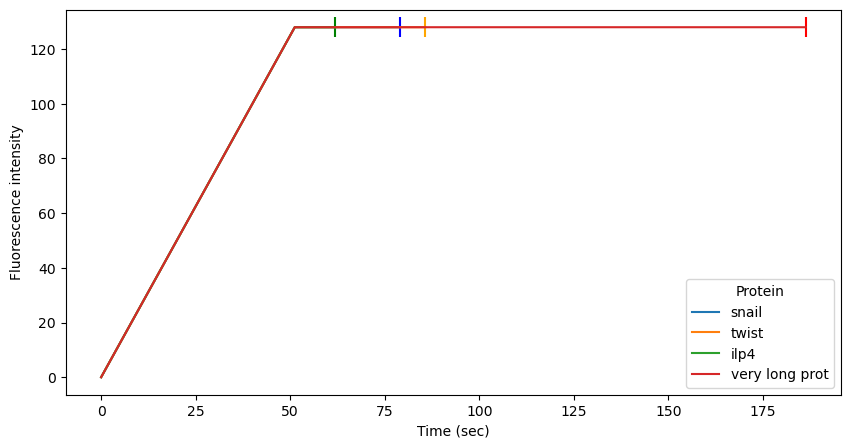

In [4]:
# Translation profil for different protein with same translation rate

translation_rate = 15 #(aa/s)
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()


prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="snail")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="blue")

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["twist"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="twist")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="orange")

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["ilp4"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="ilp4")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="green")



prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["very_long_prot"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="very long prot")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="red")



ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Protein")
fig.set_size_inches((10, 5))

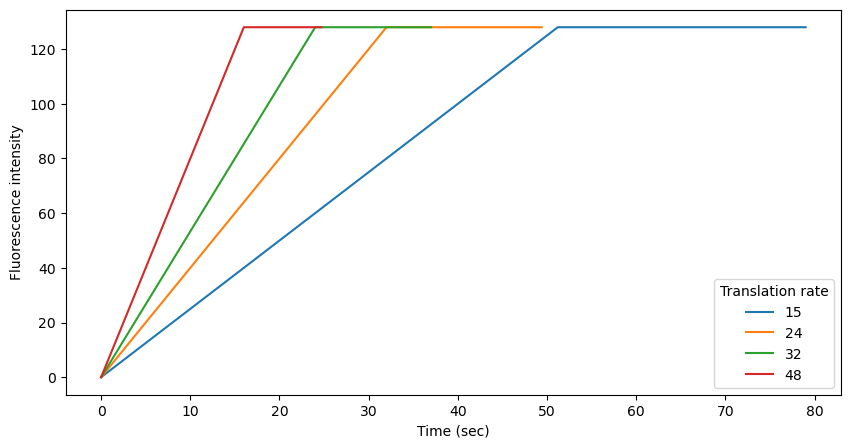

In [5]:
# Translation profil for one protein with different 

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()

translation_rate = 15 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 24 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 32 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 48 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Translation rate")
fig.set_size_inches((10, 5))

In [6]:
x_global, y_global, y_start_prot = generate_track(prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"], 
                                                  suntag_appearance=24, 
                                                  fluo_max_ref=32, 
                                                  fluo_max=128, 
                                                  translation_rate=24, 
                                                  binding_rate=0.05,
                                                  step = 0.1)

Text(0, 0.5, 'nb prot in translation')

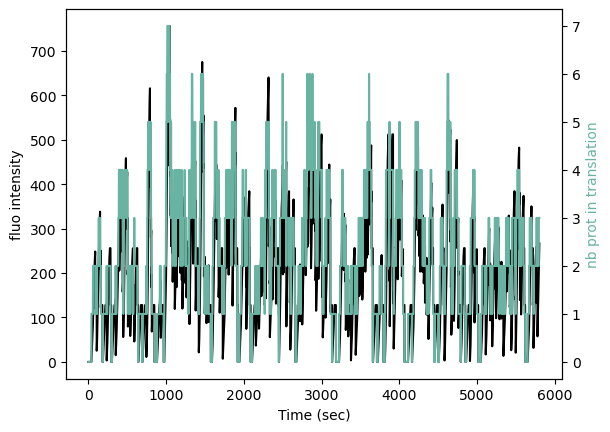

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(x_global, y_global, color="black")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("fluo intensity")

ax2 = ax.twinx()
ax2.plot(x_global, y_start_prot, color="#69b3a2")
ax2.set_ylabel("nb prot in translation", color="#69b3a2")

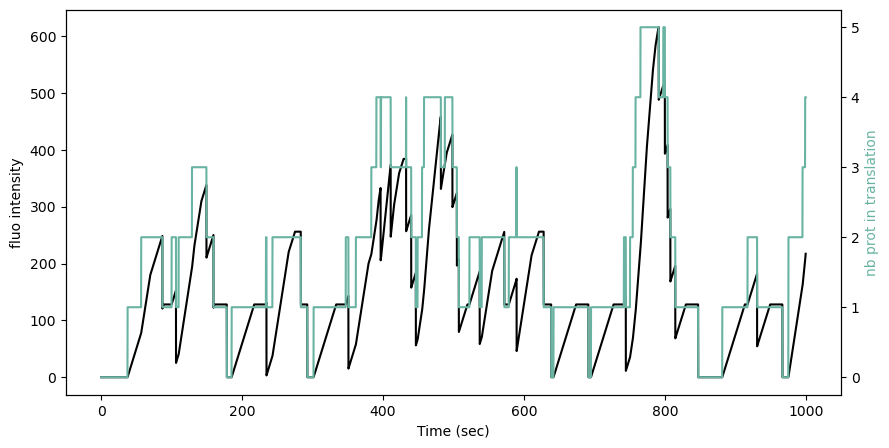

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(x_global[:10000], y_global[:10000], color="black")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("fluo intensity")

ax2 = ax.twinx()
ax2.plot(x_global[:10000], y_start_prot[:10000], color="#69b3a2")
ax2.set_ylabel("nb prot in translation", color="#69b3a2")
fig.set_size_inches((10,5))

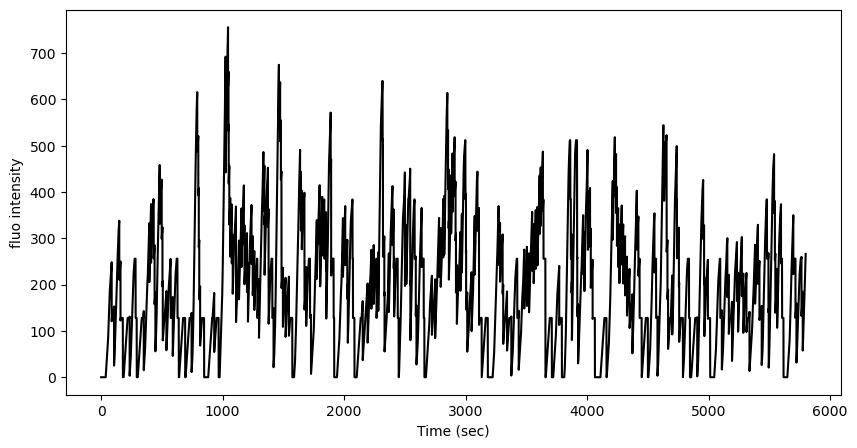

In [9]:
xx = x_global
yy = y_global
ys = y_start_prot

delta_t = 1 # 3sec
fig, ax = plt.subplots(1,1)
ax.plot(xx[::delta_t], yy[::delta_t], color="black")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("fluo intensity")

# ax2 = ax.twinx()
# ax2.plot(xx[::delta_t], ys[::delta_t], color="#69b3a2")
# ax2.set_ylabel("nb prot in translation", color="#69b3a2")
fig.set_size_inches((10,5))

In [10]:
delta_t = 100
print(xx[::delta_t])
datas = pd.DataFrame({"FRAME":xx[::delta_t],
                      "MEAN_INTENSITY_CH1":yy[::delta_t],
                      "TRACK_ID" : 1
                     })

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070.
 1080. 1090. 1100. 1110. 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190.
 1200. 1210. 1220. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310.
 1320. 1330. 1340. 1350. 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430.
 1440. 1450. 1460. 1470. 1480. 1490. 1500. 1510. 1520. 1530. 1540. 1550.
 1560. 1570. 1580. 1590. 1600. 1610. 1620. 1630. 16

In [11]:
(x, 
y, 
x_auto, 
y_auto, 
elongation_r, 
translation_init_r,
perr) = single_track_analysis(datas, 
                             1, 
                             delta_t = delta_t*0.1,
                             protein_size=prot_length,
                             normalise_intensity=1,
                             normalize_auto=True,
                             mm=None,
                             lowpass_=False,
                             cutoff=100,
                             rtol=1e-1,
                             method="linear",
                             force_analysis=True,
                             first_dot=True)
print(elongation_r, translation_init_r)

not fix
force analysis
linear method
11.86 0.0301953633295309


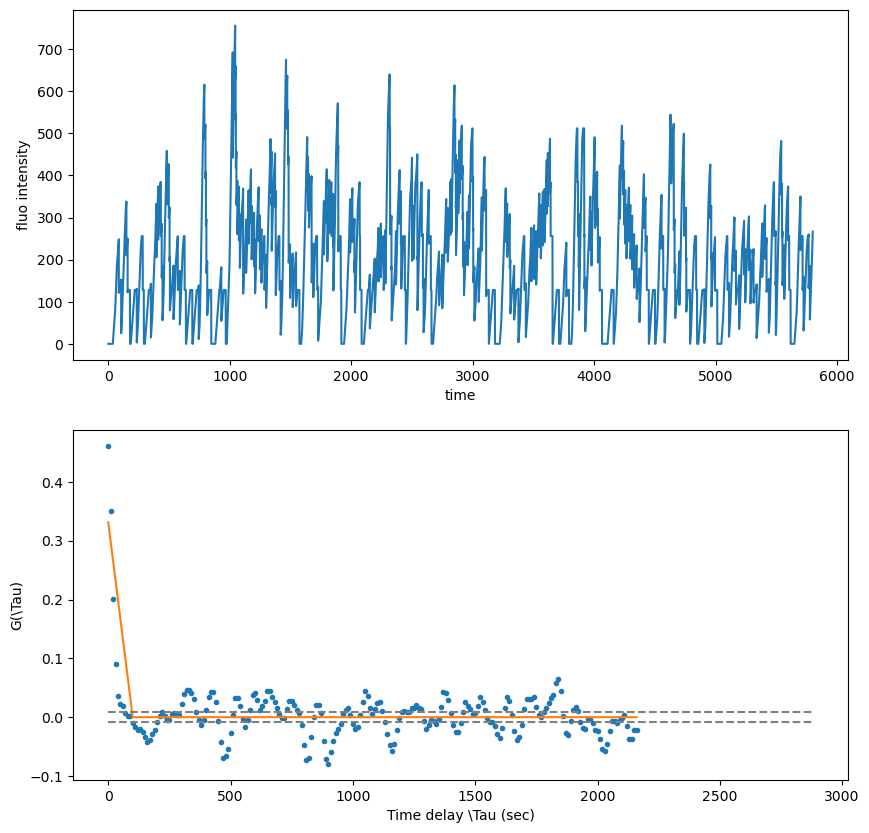

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].plot(xx, yy)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x_auto[:int(len(x_auto)/2)], y_auto[:int(len(x_auto)/2)], '.')
ax[1].plot(x_auto[:int(len(x_auto)/2)], 
           fit_function(x_auto, prot_length/elongation_r, translation_init_r)[:int(len(x_auto)/2)] )
ax[1].hlines(1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
ax[1].hlines(-1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
# ax[1].set_xlim(0,100)
fig.set_size_inches((10,10))
